# Práctica - Módulo Estadística - Guillermo Barrio

Esta es la prática de Estadística de Guillermo Barrio, consistiendo en solo este documento. Para una mejor comprensión de han añadido comentarios, separando las preguntas de las respuestas añadiendo una P(nº) a las primeras. 

In [146]:
library(ggplot2)
options(repr.plot.height=4,repr.plot.width=6)

P1 - Cargar los datos en un dataframe llamado: airbnb

Cargamos el fichero airbnb sin mayor novedad, aunque lo he puesto en el mismo directorio para no tener problemas con los path en W10.

In [147]:
airbnb<-read.csv('airbnb.csv',sep = ',')

P2 - Mostrar las primeras 6 filas del dataframe

Comprobamos las dimensiones del fichero, y luego hacemos un head() que, por defecto, devueve las 6 primeras filas. Una primera inspección muestra visualmente que la mayor parte de las filas de square.feet tienen un valor inexistente, algo que será de importancia más tarde.

In [148]:
dim(airbnb)

[1] 13207    13

In [149]:
head(airbnb,6)

Zipcode,Neighbourhood.Cleansed,Property.Type,Room.Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed.Type,Amenities,Square.Feet,Price,Review.Scores.Rating
28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


P3 - Renombrar las columnas de la siguiente forma:

| Nombre original | Nuevo nombre |
| - | - |
| Zipcode | CodigoPostal |
| Neighbourhood.Cleansed | Barrio |
| Property.Type	| TipoPropiedad |
| Room.Type | TipoAlquiler |
| Accommodates | MaxOcupantes |
| Bathrooms	| NumBanyos |
| Bedrooms	| NumDormitorios |
| Beds	|  NumCamas |
| Bed.Type	| TipoCama |
| Amenities | Comodidades |
| Square.Feet | PiesCuadrados |
| Price	| Precio |
| Review.Scores.Rating | Puntuacion |

Cambio los nombres de las columnas con el comando names, comprobándolo con un nuevo head()

In [150]:
newnames<-c("CodigoPostal","Barrio","TipoPropiedad","TipoAlquiler","MaxOcupantes","NumBanyos",
"NumDormitorios","NumCamas","TipoCama","Comodidades","PiesCuadrados","Precio","Puntuacion")

names(airbnb) <- newnames


In [151]:
head(airbnb)

CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion
28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA
28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96
28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91
28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100
28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90
28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95


P4 - Crea una nueva columna llamada MetrosCuadrados a partir de la columna PiesCuadrados.

Ayuda: 1 pie cuadrado son 0,092903 metros cuadrdados

Creamos la nueva columna introduciendo la fórmula dada, y comprobamos que se ha realizado con otro head().

In [152]:
airbnb$MetrosCuadrados <- round(airbnb$PiesCuadrados * 0.0920903, 2)

In [153]:
head(airbnb)

CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
28004,Universidad,Apartment,Private room,2,2,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Pets live on this property,Buzzer/wireless intercom,Heating,Suitable for events,Washer,First aid kit,Essentials,Lock on bedroom door,Iron",NA,35,NA,NA
28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96,NA
28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91,NA
28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100,NA
28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90,49.54
28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95,NA


P5 - Miremos el código postal. Es una variable con entradas erroneas.
Hay valores como '', '-'  y '28' que deberían ser considerados como NA.
Así mismo también debería ser NA todos los que no compiencen por 28, ya que estamos con códigos postales de Madrid

El código postal 28002, 28004 y 28051 tienen entradas repetidas. 
Por ejemplo las entradas 28002\n20882 deberían ir dnetro de 28002

El codigo 2804 debería ser 28004, 2805 deberia ser 28005 y 2815 juncto con 2815 debería ser 28015

Limpia los datos de la columna Codigo Postal

En este caso podemos ver los distintos códigos postales mediante la función unique(). Nos da una serie de CP que son claramente incorrectos. Con todo, algunos errores son de corrección muy fácil, tales como 280013, o 28002\n\28002, por los que los podemos corregir sin dificultad. En otros casos podemos consultar la fila compreta y, haciendo una rápida búsqueda en la web, se encuentra el CP correcto. Soy consciente que esto no se podría generalizar, pero lo cierto es que los errores son todos únicos, solo ocurren una vez, con lo que el esfuerzo de corregirlos no es muy superior a eliminar todo el registro.

In [154]:
unique(airbnb$CodigoPostal)

[1] 28004        28015        28013        28005        28012       
 [6] 28014        28045        27013                     28007       
[11] 28028        28009        28001        28006        28010       
[16] 28002        28034        28050        28008        28011       
[21] 28049        28038        28053        28047        28025       
[26] 28019        28024        28016        28036        28046       
[31] 28039        28020        28003        28029        28054       
[36] 28041        28026        28058        28018        28030       
[41] 28017        28027        28043        28033        28055       
[46] 28021        28032        28037        28022        28042       
[51] 28094        280013       28002\n28002 28035        28040       
[56] 28031        28044        28105        28023        2805        
[61] 28051        Madrid 28004 20126        28051\n28051 28850       
[66] 28048        28056        20013        27004        28060       
[71] -            28           2815         25008        2015        
[76] 28052        2804        
77 Levels:  - 20013 20126 2015 25008 27004 27013 28 28001 280013 ... Madrid 28004

In [155]:
airbnb[airbnb$CodigoPostal == "2815", ]

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
10419,2815,Trafalgar,Apartment,Private room,2,1,1,1,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Breakfast,Elevator in building,Hot tub,Heating,Family/kid friendly,Washer,Smoke detector,First aid kit,Fire extinguisher,Essentials,Shampoo,translation missing: en.hosting_amenity_49",NA,80,NA,NA


In [156]:
airbnb[10419, "CodigoPostal"] <- "28015"

In [157]:
airbnb[10419,]

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
10419,28015,Trafalgar,Apartment,Private room,2,1,1,1,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Breakfast,Elevator in building,Hot tub,Heating,Family/kid friendly,Washer,Smoke detector,First aid kit,Fire extinguisher,Essentials,Shampoo,translation missing: en.hosting_amenity_49",NA,80,NA,NA


In [158]:
airbnb[airbnb$CodigoPostal == "2804", ]

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
12709,2804,Universidad,Apartment,Entire home/apt,2,1,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Heating,Washer,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron",NA,45,95,NA


In [159]:
airbnb[12709, "CodigoPostal"] <- "28044"

In [160]:
airbnb[airbnb$CodigoPostal == "Madrid 28004", ]

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
2947,Madrid 28004,Justicia,Apartment,Private room,2,1,1,1,Real Bed,"TV,Wireless Internet,Kitchen,Smoking allowed,Doorman,Elevator in building,Heating,Washer,First aid kit,Fire extinguisher,Shampoo",NA,50,60,NA


In [161]:
airbnb[2947, "CodigoPostal"] <- "28004"

In [162]:
airbnb[airbnb$CodigoPostal == "280013", ]

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
536,280013,Palacio,Apartment,Entire home/apt,4,2.5,2,2,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Heating,Washer,Dryer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,220,95,NA


In [163]:
airbnb[536, "CodigoPostal"] <- "28013"

In [164]:
airbnb[airbnb$CodigoPostal == "28051\n28051", ]

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
4242,28051 28051,Casco HistÃ³rico de Vallecas,Apartment,Private room,1,1,1,1,Real Bed,"Wheelchair accessible,Breakfast,Elevator in building",NA,21,100,NA


In [165]:
airbnb[4242, "CodigoPostal"] <- "28051"

In [166]:
airbnb[airbnb$CodigoPostal == "2805", ]

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
1925,2805,Universidad,Apartment,Private room,2,2.5,4,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Kitchen,Doorman,Pets live on this property,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,27,100,NA


In [167]:
airbnb[1925, "CodigoPostal"] <- "28035"

In [168]:
airbnb[airbnb$CodigoPostal == "28002\n28002", ]

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
642,28002 28002,Prosperidad,Apartment,Private room,2,1,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Free parking on premises,Doorman,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,First aid kit,Fire extinguisher,Essentials,Shampoo,Lock on bedroom door,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,70,100,NA


In [169]:
airbnb[642, "CodigoPostal"] <- "28002"

In [170]:
airbnb[airbnb$CodigoPostal == "-", ]

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
10030,-,Recoletos,House,Entire home/apt,10,6,4,9,Real Bed,,NA,NA,NA,NA


In [171]:
airbnb[10030, "CodigoPostal"] <- "28001"

In [172]:
airbnb[airbnb$CodigoPostal == "2015", ]

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
11817,2015,Universidad,Apartment,Entire home/apt,4,1,2,3,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Doorman,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,75,94,NA


In [173]:
airbnb[11817, "CodigoPostal"] <- "28035"

In [174]:
airbnb[airbnb$CodigoPostal == "28", ]

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
10278,28,San Pascual,Apartment,Entire home/apt,2,1,1,2,Real Bed,"Kitchen,Elevator in building,Heating,Washer,Essentials",NA,31,93,NA


In [175]:
airbnb[10278, "CodigoPostal"] <- "28027"

In [176]:
airbnb[airbnb$CodigoPostal == "27004", ]

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
9712,27004,Universidad,House,Private room,2,1,1,1,Real Bed,"Wireless Internet,Kitchen,Buzzer/wireless intercom,Heating,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,22,84,NA


In [177]:
airbnb[9712, "CodigoPostal"] <- "28040"

In [178]:
airbnb[airbnb$CodigoPostal == "20126", ]

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
4064,20126,MoscardÃ³,Apartment,Entire home/apt,6,1,3,4,Real Bed,"TV,Wireless Internet,Kitchen,Elevator in building,Heating,Family/kid friendly,Washer,First aid kit,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,translation missing: en.hosting_amenity_50",NA,60,99,NA


In [179]:
airbnb[4064, "CodigoPostal"] <- "28020"

In [180]:
airbnb[airbnb$CodigoPostal == "25008", ]

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
11115,25008,Sol,Bed & Breakfast,Shared room,1,1,1,1,Real Bed,"Wireless Internet,Breakfast,Essentials,Iron,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,19,100,NA


In [181]:
airbnb[11115, "CodigoPostal"] <- "28028"

In [182]:
airbnb[airbnb$CodigoPostal == "20013", ]

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
7995,20013,Sol,House,Entire home/apt,4,1,0,2,Real Bed,"TV,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Essentials,Shampoo",NA,60,63,NA


In [183]:
airbnb[7995, "CodigoPostal"] <- "28013"

In [184]:
airbnb[airbnb$CodigoPostal == "27013", ]

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
58,27013,Sol,Bed & Breakfast,Private room,2,1,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Breakfast,Elevator in building,Hot tub,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,56,94,NA


In [185]:
airbnb[58, "CodigoPostal"] <- "28013"

P6 - Una vez limpios los datos ¿Cuales son los códigos postales que tenemos? 

Mostramos los CP restantes mediante otro unique. Se acompaña de un table(), que comprueba que los antiguos CP raros tienen ahora una cantidad cero.

In [186]:
unique(airbnb$CodigoPostal)

[1] 28004 28015 28013 28005 28012 28014 28045       28007 28028 28009 28001
[13] 28006 28010 28002 28034 28050 28008 28011 28049 28038 28053 28047 28025
[25] 28019 28024 28016 28036 28046 28039 28020 28003 28029 28054 28041 28026
[37] 28058 28018 28030 28017 28027 28043 28033 28055 28021 28032 28037 28022
[49] 28042 28094 28035 28040 28031 28044 28105 28023 28051 28850 28048 28056
[61] 28060 28052
77 Levels:  - 20013 20126 2015 25008 27004 27013 28 28001 280013 ... Madrid 28004

In [187]:
table(airbnb$CodigoPostal)


                        -        20013        20126         2015        25008 
         439            0            0            0            0            0 
       27004        27013           28        28001       280013        28002 
           0            0            0          232            0          171 
28002\n28002        28003        28004        28005        28006        28007 
           0          185         1795         1194          218          206 
       28008        28009        28010        28011        28012        28013 
         338          216          384          250         2060         1022 
       28014        28015        28016        28017        28018        28019 
         630          601           76          107           43          200 
       28020        28021        28022        28023        28024        28025 
         193           58           30           23           44          123 
       28026        28027        28028        28029

P7 - ¿Cuales son los 5 códigos postales con más entradas? ¿Y con menos? ¿Cuantas entradas tienen?

Para contestar este tipo de preguntas existe la función count() dentro de la librería dplyr, que cargamos para oder utilizarla. Count() devuelve un dataframe, que llamamos NumEnt, y que luego orderamos primero ascendentemente, y luego descendentemente, seleccionando las 5 primeras y últimas filas, algo que podíamos haber hecho con head() también.

In [188]:
library(dplyr)

In [189]:
NumEnt <- count(airbnb, vars = CodigoPostal)
NumEnt[order(NumEnt$n)[1:5], ]

vars,n
28048,1
28052,1
28056,1
28058,1
28060,1


In [190]:
NumEnt[order(NumEnt$n, decreasing = TRUE )[1:5], ]

vars,n
28012,2060
28004,1795
28005,1194
28013,1022
28014,630


P8 - ¿Cuales son los barrios que hay en el código postal 28012?

Hacemos una selección de ese código postal, que almacenamos en el DF DFaux, y luego aplicamos un unique para encontrar los barrios.

In [191]:
DFaux <- airbnb[airbnb$CodigoPostal == "28012", ]

unique(DFaux$Barrio)

[1] Sol             Acacias         Palos de Moguer Embajadores    
 [5] Cortes          Palacio         Universidad     Delicias       
 [9] Arapiles        Atocha          Goya           
125 Levels: Abrantes Acacias Adelfas Aeropuerto Aguilas ... ZofÃ­o

P9 - ¿Cuantas entradas hay en cada uno de esos barrios para el codigo postal 28012?

Aplicamos de nuevo l función count(). Es aquí donde se demuestra lo cómodo que es el que devuelva un DF.

In [192]:
count(DFaux, vars = Barrio)


vars,n
Acacias,13
Arapiles,1
Atocha,1
Cortes,216
Delicias,1
Embajadores,1449
Goya,1
Palacio,27
Palos de Moguer,46
Sol,301


P10 - ¿Cuantos barrios hay en todo el dataset airbnb? ¿Cuales son?

Aplicamos la función unique() a la columna Barrio, que nos devuelve un vector, cuya length comprobamos que es 125.

In [193]:
barriosMad <- unique(airbnb$Barrio)

barriosMad

[1] Universidad                    Sol                           
  [3] Imperial                       Acacias                       
  [5] Chopera                        Delicias                      
  [7] Palos de Moguer                Embajadores                   
  [9] Cortes                         Atocha                        
 [11] PacÃ­fico                      Adelfas                       
 [13] Estrella                       Ibiza                         
 [15] JerÃ³nimos                     NiÃ±o JesÃºs                  
 [17] Palacio                        Justicia                      
 [19] Recoletos                      Goya                          
 [21] Fuente del Berro               Arapiles                      
 [23] Trafalgar                      Almagro                       
 [25] Guindalera                     Lista                         
 [27] Castellana                     El Viso                       
 [29] Prosperidad                    Valverde                      
 [31] Casa de Campo                  El Goloso                     
 [33] Numancia                       CÃ¡rmenes                     
 [35] Puerta del Angel               Lucero                        
 [37] Aluche                         San Isidro                    
 [39] Campamento                     Comillas                      
 [41] OpaÃ±el                        Vista Alegre                  
 [43] Ciudad JardÃ­n                 HispanoamÃ©rica               
 [45] Nueva EspaÃ±a                  Castilla                      
 [47] Bellas Vistas                  Cuatro Caminos                
 [49] Castillejos                    Vallehermoso                  
 [51] Almenara                       Valdeacederas                 
 [53] Berruguete                     Gaztambide                    
 [55] Rios Rosas                     PeÃ±agrande                   
 [57] ArgÃ¼elles                     Puerta Bonita                 
 [59] Buenavista                     Abrantes                      
 [61] Orcasur                        San FermÃ­n                   
 [63] Almendrales                    Pradolongo                    
 [65] Portazgo                       EntrevÃ­as                    
 [67] San Diego                      Palomeras Bajas               
 [69] FontarrÃ³n                     Vinateros                     
 [71] Ventas                         Pueblo Nuevo                  
 [73] Quintana                       ConcepciÃ³n                   
 [75] San Juan Bautista              Costillares                   
 [77] Piovera                        Canillas                      
 [79] Pinar del Rey                  Apostol Santiago              
 [81] San AndrÃ©s                    Valdefuentes                  
 [83] Butarque                       Los Angeles                   
 [85] Casco HistÃ³rico de VicÃ¡lvaro Simancas                      
 [87] Rejas                          Salvador                      
 [89] Casco HistÃ³rico de Barajas    Pilar                         
 [91] La Paz                         Mirasierra                    
 [93] Ciudad Universitaria           MoscardÃ³                     
 [95] Palomeras Sureste              Marroquina                    
 [97] Media Legua                    Los Rosales                   
 [99] Casco HistÃ³rico de Vallecas   TimÃ³n                        
[101] Corralejos                     Cuatro Vientos                
[103] Colina                         San Cristobal                 
[105] Alameda de Osuna               Aeropuerto                    
[107] Palomas                        ZofÃ­o                        
[109] Aguilas                        Legazpi                       
[111] Fuentelareina                  Aravaca                       
[113] Ambroz                         Canillejas                    
[115] Valdezarza                     Amposta                       
[117] San Pascual                    Santa Eugenia        

In [194]:
length(barriosMad)

[1] 125

P11 - ¿Cuales son los 5 barrios que tienen mayor número entradas?

De nuevo, aplicamos la función count(), que nos da un DF que ordenamos de mayor a menor, mostrando la primeras 5 filas.

In [195]:
numBarrios <- count(airbnb, vars = Barrio)

numBarrios[order(numBarrios$n, decreasing = TRUE)[1:5],]

vars,n
Embajadores,1844
Universidad,1358
Palacio,1083
Sol,940
Justicia,785


P12 - ¿Cuantos Tipos de Alquiler diferentes hay? ¿Cuales son? ¿Cuantas entradas en el dataframe hay por cada tipo?

Aplicamos otra vez unique(), encontrando tres tipos de alquiler diferentes. Después aplicamos otravez count() para saber las entradas de cada uno. El shared room es, con diferencia, el que menos tiene.

In [196]:
unique(airbnb$TipoAlquiler)

[1] Private room    Entire home/apt Shared room    
Levels: Entire home/apt Private room Shared room

In [197]:
length(unique(airbnb$TipoAlquiler))

[1] 3

In [198]:
count(airbnb, vars = TipoAlquiler)

vars,n
Entire home/apt,7903
Private room,5113
Shared room,191


P13 - Muestra el diagrama de cajas del precio para cada uno de los diferentes Tipos de Alquiler

Ejecutamos ggplot con las columna TipoAlquiler en el eje x, y Precio en el eje y. Hemos tenido que cargar ggplot otra vez (primera celda), quizás debido a alguna interferencia con dplyr. 

Vemos que hay un buen número de outliers, pero hay que tener en cuenta que el número de registros es también muy grande.

Warning message:
"Removed 9 rows containing non-finite values (stat_boxplot)."

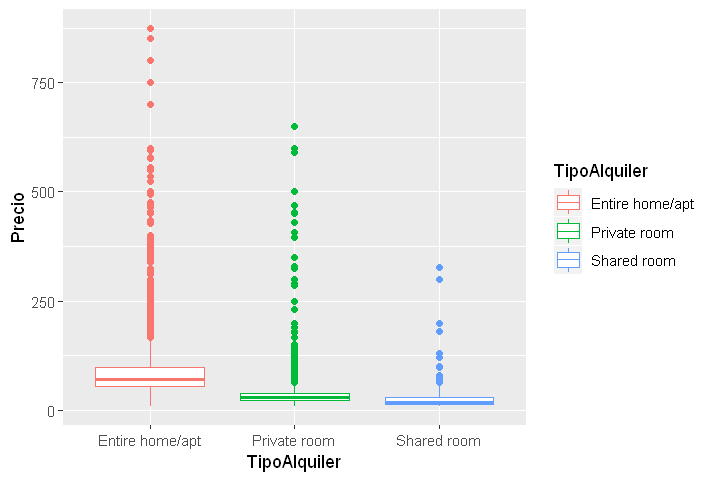

In [199]:
ggplot(data = airbnb,
      aes(x = TipoAlquiler, y = Precio, color = TipoAlquiler)) +
geom_boxplot()

P14 - Cual es el precio medio de alquiler de cada uno, la diferencia que hay ¿es estadísticamente significativa?
¿Con que test lo comprobarías?

Podemos calcular los precios medios mediante la función aggregate(), que los da, como cabía esperar, una media muy diferente entre los precios de apartamentos enteros y habitaciones por separado, y/o compartidas. De todas formas hay que comprobar si la diferencia es estadísticamente significativa.

In [200]:
aggregate(airbnb[ , c("Precio")], by = list(PrecioMedio = airbnb$TipoAlquiler), FUN = mean, na.rm = TRUE)

PrecioMedio,x
Entire home/apt,87.29661
Private room,34.25514
Shared room,29.85340


Ya que tenemos tres variables, intentaremos utilizar el test ANOVA. Para ello, tenemos que comprobar que los precios en cada tipo de alquiler tienen distribución normal.

Por comodidad, almacenamos cada tipo de alquiler en un vector, tiposAlq 


In [201]:
tiposAlq <- unique(airbnb$TipoAlquiler)

tiposAlq

[1] Private room    Entire home/apt Shared room    
Levels: Entire home/apt Private room Shared room

Ahora aplicamos Shapiro para ver si las tres variables son normales. Tenemos el pequeño contratiempo que el método no admite más de 5.000 filas, por lo que hacemos un sample() de los tipos de alquiler Private room y Entire Home.

In [221]:
samplePR <- sample_n(airbnb[airbnb$TipoAlquiler == tiposAlq[1], ], 4999)

In [222]:
head(samplePR)

CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
28005,Embajadores,Apartment,Private room,2,1,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Smoking allowed,Heating,Essentials",NA,30,84,NA
28004,Universidad,Apartment,Private room,1,2,1,1,Real Bed,"translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,25,NA,NA
28005,Palacio,Apartment,Private room,1,1,1,1,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Breakfast,Pets live on this property,Cat(s),Heating,Washer,Essentials,Shampoo,Hangers,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,33,94,NA
28014,Cortes,Other,Private room,1,1,1,1,Real Bed,Wireless Internet,NA,500,NA,NA
28015,Arapiles,Apartment,Private room,1,2,1,1,Real Bed,"Internet,Wireless Internet,Kitchen,Smoking allowed,Pets allowed,Pets live on this property,Elevator in building,Heating,Washer,First aid kit,Essentials,Shampoo",NA,20,NA,NA
28041,Orcasur,Apartment,Private room,2,1,1,1,Real Bed,"Wireless Internet,Kitchen,Pets live on this property,Elevator in building,Heating,Family/kid friendly,Essentials,Shampoo",NA,20,83,NA


In [223]:
sampleEH <- sample_n(airbnb[airbnb$TipoAlquiler == tiposAlq[2], ], 4999)

In [224]:
head(sampleEH)

CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
28003,Ciudad Universitaria,Apartment,Entire home/apt,4,2,2,3,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Dryer,Fire extinguisher,Essentials",NA,63,100,NA
28012,Embajadores,Apartment,Entire home/apt,4,1,1,2,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Heating,Family/kid friendly,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,Lock on bedroom door,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,67,95,NA
28001,Goya,Apartment,Entire home/apt,4,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Pool,Kitchen,Gym,Elevator in building,Heating,Family/kid friendly,Washer,Dryer,Essentials,Shampoo,Hangers,Hair dryer,Iron",NA,90,100,NA
28027,Quintana,Apartment,Entire home/apt,5,1,3,4,Real Bed,"TV,Wheelchair accessible,Kitchen,Pets allowed,Doorman,Elevator in building,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Essentials,Hangers,Hair dryer,Iron",NA,78,100,NA
28004,Justicia,Apartment,Entire home/apt,4,1,0,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Breakfast,Elevator in building,Heating,Family/kid friendly,Washer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry,Private living room",NA,65,97,NA
28011,Puerta del Angel,Apartment,Entire home/apt,5,1,2,3,Real Bed,"Kitchen,Pets allowed,Buzzer/wireless intercom,Washer",NA,48,NA,NA


Ya podemos aplicar Shapiro, con la sorpresa aparente que ninguno de los tipos de alquiler da normal; es más, por el p-value que obtenemos e-16, ni siquiera está cercano.

In [289]:
shapiro.test(samplePR$Precio[samplePR$TipoAlquiler == tiposAlq[1]]) # shapiro Private room


	Shapiro-Wilk normality test

data:  samplePR$Precio[samplePR$TipoAlquiler == tiposAlq[1]]
W = 0.38277, p-value < 2.2e-16


In [292]:
shapiro.test(sampleEH$Precio[sampleEH$TipoAlquiler == tiposAlq[2]]) # shapiro Entire Home


	Shapiro-Wilk normality test

data:  sampleEH$Precio[sampleEH$TipoAlquiler == tiposAlq[2]]
W = 0.63628, p-value < 2.2e-16


In [293]:
shapiro.test(airbnb$Precio[airbnb$TipoAlquiler == tiposAlq[3]]) # shapiro shared homes


	Shapiro-Wilk normality test

data:  airbnb$Precio[airbnb$TipoAlquiler == tiposAlq[3]]
W = 0.4436, p-value < 2.2e-16


Para estar seguros de estos resultados dibujamos un histograma del Entire Home

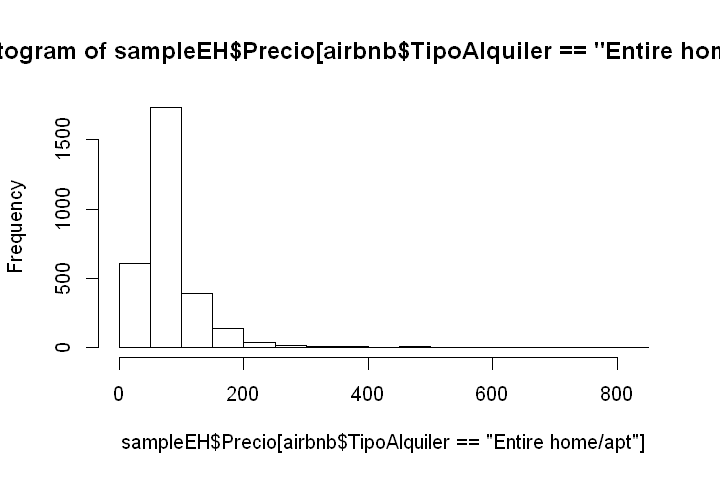

In [237]:
hist(sampleEH$Precio[airbnb$TipoAlquiler == "Entire home/apt"])

Parece que tiene las colas claramente descompensadas. Hacemos el QQ plot de Entire Home y Private room, que confirma que no estamos ante una distribución normal.

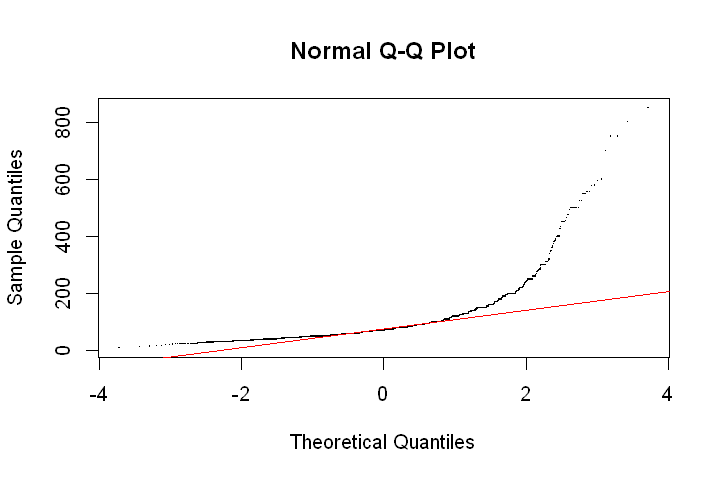

In [296]:
qqnorm(sampleEH$Precio[sampleEH$TipoAlquiler == tiposAlq[2]], pch = ".")
qqline(sampleEH$Precio[sampleEH$TipoAlquiler == tiposAlq[2]], col = "red")

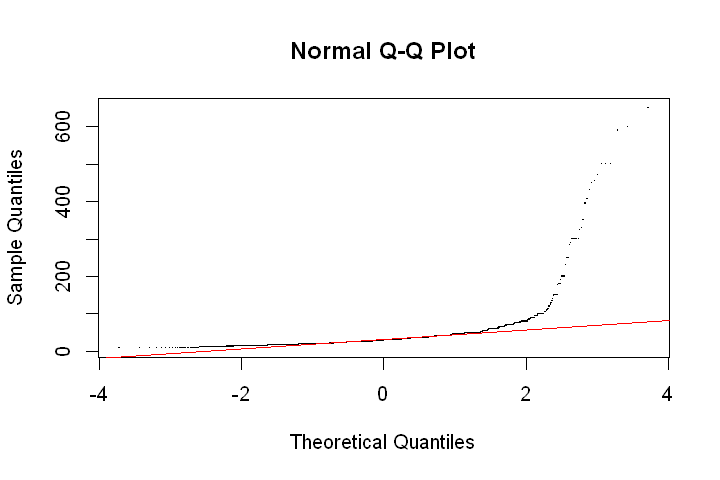

In [297]:
qqnorm(samplePR$Precio[samplePR$TipoAlquiler == tiposAlq[1]], pch = ".")
qqline(samplePR$Precio[samplePR$TipoAlquiler == tiposAlq[1]], col = "red")

Ya que no estamos ante una distribución normal, tenemos que aplicar el test de Krustal-Wallis, que nos da, como cabía esperar, un p-value de prácticamente cero, confirmando lo que ya sabíamos: las medias de los tres tipos de alquiler no son iguales. 

In [238]:
KWtest <- kruskal.test(Precio ~ TipoAlquiler, data = airbnb)

In [239]:
KWtest


	Kruskal-Wallis rank sum test

data:  Precio by TipoAlquiler
Kruskal-Wallis chi-squared = 7235.6, df = 2, p-value < 2.2e-16


Podríamos comprobar que quien falla (tiene una media diferente) es Entire Home, pero el test de Tukey no admite el test de KW

In [240]:
TukeyHSD(kruskal.test(Precio ~ TipoAlquiler, data = airbnb))

ERROR: Error in UseMethod("TukeyHSD"): no applicable method for 'TukeyHSD' applied to an object of class "htest"


Ya, ya sabemos que no podemos aplicar ANOVA, pero por curiosidad probamos a aplicarlo, y meterlo en Tukey, para ver si, quizás, si captamos que los precios medios de Private room y Shared room son iguales, y, efectivamente, no podemos descartar esa hipótesis nula.

In [241]:
testANOVA_aov <- aov(Precio ~ TipoAlquiler, data = airbnb)

In [242]:
summary(testANOVA_aov)

                Df   Sum Sq Mean Sq F value Pr(>F)    
TipoAlquiler     2  8981217 4490608    1828 <2e-16 ***
Residuals    13195 32417217    2457                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1
9 observations deleted due to missingness

In [243]:
TukeyHSD(aov(Precio ~ TipoAlquiler, data = airbnb))

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Precio ~ TipoAlquiler, data = airbnb)

$TipoAlquiler
                                   diff       lwr        upr     p adj
Private room-Entire home/apt -53.041470 -55.12724 -50.955700 0.0000000
Shared room-Entire home/apt  -57.443203 -65.95082 -48.935587 0.0000000
Shared room-Private room      -4.401733 -12.96392   4.160453 0.4501858


P15 - Filtra el dataframe cuyos tipo de alquiler sea  'Entire home/apt' y guardalo en un dataframe llamado 
*airbnb_entire*.
Estas serán las entradas que tienen un alquiler del piso completo.

Filtramos el dataframe, y comprebamos sus dimensiones, efectivamente tiene las filas que debe tener, 7.903.

In [244]:
airbnb_entire <- subset(airbnb, TipoAlquiler == "Entire home/apt")

In [245]:
airbnb_entire

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
2,28004,Universidad,Apartment,Entire home/apt,6,1,3,5,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Indoor fireplace,Heating,Family/kid friendly,Washer,Dryer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo",NA,92,96,NA
3,28004,Universidad,Apartment,Entire home/apt,3,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,55,91,NA
4,28004,Universidad,Loft,Entire home/apt,3,2,1,1,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Pets allowed,Breakfast,Elevator in building,Indoor fireplace,Buzzer/wireless intercom,Heating,Washer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50",NA,60,100,NA
5,28015,Universidad,Apartment,Entire home/apt,5,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Iron",538,75,90,49.54
6,28004,Universidad,Apartment,Entire home/apt,2,1,0,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace,Self Check-In,Doorman Entry",NA,55,95,NA
8,28004,Universidad,Apartment,Entire home/apt,3,1,1,NA,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Washer",NA,70,84,NA
9,28015,Universidad,Apartment,Entire home/apt,2,1,1,1,Real Bed,"TV,Internet,Wireless Internet,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Dryer,Essentials,Shampoo,translation missing: en.hosting_amenity_49",700,90,98,64.46
10,28004,Universidad,Apartment,Entire home/apt,4,2,2,2,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Hot tub,Heating,Family/kid friendly,Washer,Dryer,Essentials,Hair dryer,Iron",NA,155,NA,NA
11,28004,Universidad,Apartment,Entire home/apt,4,1,1,2,Real Bed,"TV,Wireless Internet,Air conditioning,Wheelchair accessible,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Essentials,Shampoo",40,70,90,3.68
15,28013,Sol,Apartment,Entire home/apt,4,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Suitable for events,Washer,Essentials,Hangers,Hair dryer,Iron",646,75,91,59.49


In [246]:
dim(airbnb_entire)

[1] 7903   14

P16 - ¿Cuales son los 5 barrios que tienen un mayor número de apartamentos enteros en alquiler?
Nota: Mirar solo en airbnb_entire. A partir de este punto y hasta que se diga lo contrario partiremos de airbnb_entire.

Aplicamos de nuevo la función count(), y mostramos los 5 mayores valores

In [247]:
DFaux2 <- count(airbnb_entire, Barrio)

DFaux2[order(DFaux2$n, decreasing = TRUE)[1:5],]

Barrio,n
Embajadores,1228
Universidad,984
Palacio,769
Sol,701
Cortes,574


P17 - ¿Cuales son los 5 barrios que tienen un mayor precio medio de alquiler para apartamentos enteros (es decir, del dataframe airbnb_entire)?

¿Cual es su precio medio?

Ayuda: Usa la función aggregate `aggregate(.~colname,df,mean,na.rm=TRUE)`

Aplicamos la función aggregate, de una manera más verbosa que la propuesta en el enunciado.

In [249]:
DFaux3 <- aggregate(airbnb_entire[ , "Precio"], by = list(airbnb_entire$Barrio), FUN = mean, na.rm = TRUE)

names (DFaux3) <- c("Barrio", "PrecioMedio")

DFaux3[order(DFaux3$PrecioMedio, decreasing = TRUE)[1:5],]

,Barrio,PrecioMedio
77,Palomas,309.7500
50,Fuentelareina,180.0000
93,Recoletos,161.9254
43,El PlantÃ­o,150.0000
30,Castellana,141.3889


In [224]:
?names

P18 - ¿Cuantos apartamentos hay en cada uno de esos barrios?

Mostrar una dataframe con el nombre del barrio, el precio y el número de entradas.

Ayuda: Podeis crear un nuevo dataframe con las columnas "Barrio" y "Freq" que contenga el número de entradas en cada barrio y hacer un merge con el dataframe del punto anterior.

Creamos un DF con las columnas "Barrio" y "Freq" con count(), teniendo que renonmbrarlas. Hacemos el merge pedido en el enunciado, que llamamos barrioPrecio, que volvemos a ordenar según su mayor precio.

In [252]:
DFaux4 <- count(airbnb_entire, Barrio)
names (DFaux4) <- c("Barrio", "Freq")

head(DFaux4)


Barrio,Freq
Abrantes,3
Acacias,61
Adelfas,33
Aeropuerto,2
Aguilas,2
Alameda de Osuna,4


In [253]:
barrioPrecio <- merge(x = DFaux3, y = DFaux4, by = c("Barrio"))

barrioPrecio[order(barrioPrecio$PrecioMedio, decreasing = TRUE)[1:5],]

,Barrio,PrecioMedio,Freq
77,Palomas,309.7500,4
50,Fuentelareina,180.0000,2
93,Recoletos,161.9254,135
43,El PlantÃ­o,150.0000,1
30,Castellana,141.3889,73


P19 - Partiendo del dataframe anterior, muestra los 5 barrios con mayor precio, pero que tengan más de 100 entradas de alquiler.

Seleccionamos del DF barrioPrecio los que tienen más de 100 entradas, y los volvemos a ordenar por precios. Al DF resultante lo llamamos barriosCaros

In [254]:
DFaux5 <- barrioPrecio[barrioPrecio$Freq > 100, ] #[order(barrioPrecio$PrecioMedio, decreasing = TRUE)[1:5], ]

barriosCaros <- DFaux5[order(DFaux5$PrecioMedio, decreasing = TRUE)[1:5],]

barriosCaros

,Barrio,PrecioMedio,Freq
93,Recoletos,161.92537,135
52,Goya,111.33803,142
106,Sol,100.75036,701
108,Trafalgar,98.57848,223
59,Justicia,98.25468,534


P20 - Dibuja el diagrama de densidad de distribución de los diferentes precios. Serían 5 gráficas, una por cada barrio.

La intención inicial era hacer un for loop que introdujese cada barrio en ggplot, pero no fui capaz de hacerlo, simplemente no imprimía nada. El vector nnn contiene los nombres de los Barrios concernidos. No he borrado el intento del for loop.

In [261]:
nnn <- barriosCaros$Barrio

nnn

#for (i in 1:length(nnn)) {
    
 #   barrioPr <- airbnb_entire[airbnb_entire$Barrio == nnn[i], ]$Precio
    
  #  print(i)
    
   # print(barrioPr)
    
    # print(barrioPr)
    
  # ggplot(data=data.frame(x=barrioPr[i]), aes(x))+
  #  geom_density(fill="#7070BB",color="#010101")
    
# }




[1] Recoletos Goya      Sol       Trafalgar Justicia 
125 Levels: Abrantes Acacias Adelfas Aeropuerto Aguilas ... ZofÃ­o

Por desgracia, hay que imprimir los gráficos uno a uno...

Warning message:
"Removed 1 rows containing non-finite values (stat_density)."

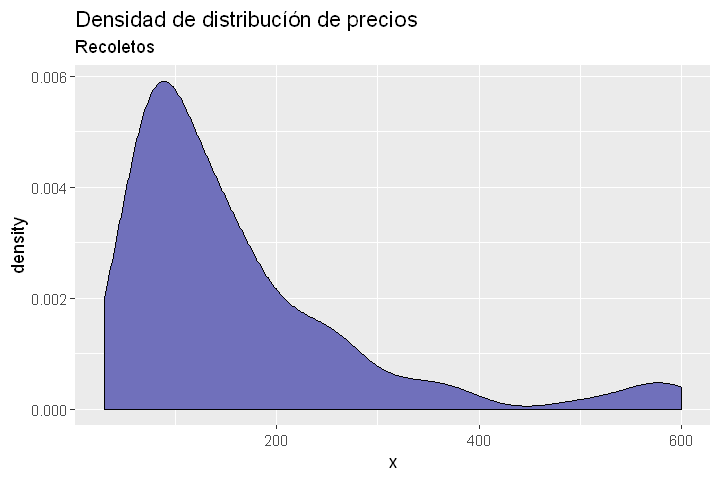

In [262]:
barrioPr <- airbnb_entire[airbnb_entire$Barrio == nnn[1], ]$Precio

ggplot(data=data.frame(x=barrioPr), aes(x))+
geom_density(fill="#7070BB",color="#010101")+
 ggtitle("Densidad de distribucíón de precios ", nnn[1])

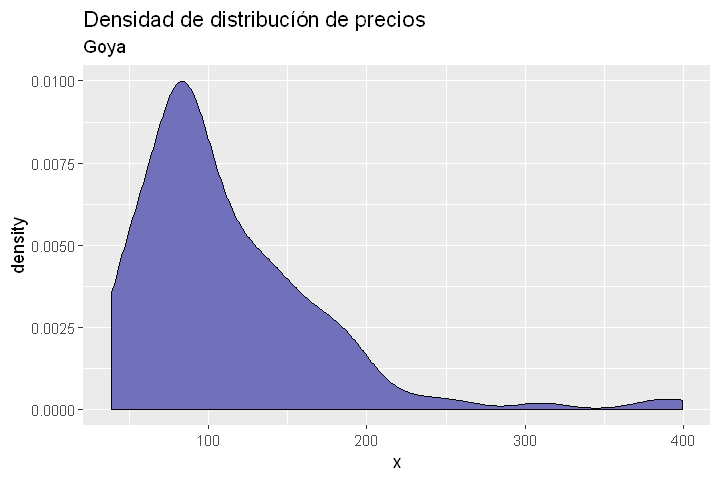

In [263]:
barrioPr <- airbnb_entire[airbnb_entire$Barrio == nnn[2], ]$Precio

ggplot(data=data.frame(x=barrioPr), aes(x))+
geom_density(fill="#7070BB",color="#010101")+
 ggtitle("Densidad de distribucíón de precios", nnn[2])

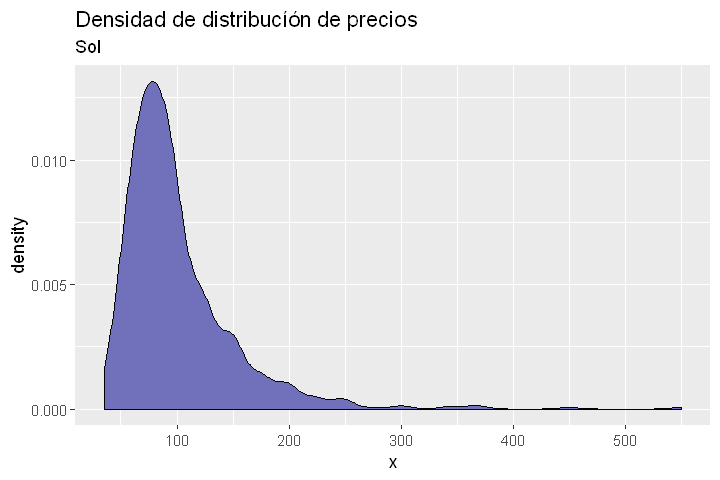

In [264]:
barrioPr <- airbnb_entire[airbnb_entire$Barrio == nnn[3], ]$Precio

ggplot(data=data.frame(x=barrioPr), aes(x))+
geom_density(fill="#7070BB",color="#010101")+
 ggtitle("Densidad de distribucíón de precios", nnn[3])

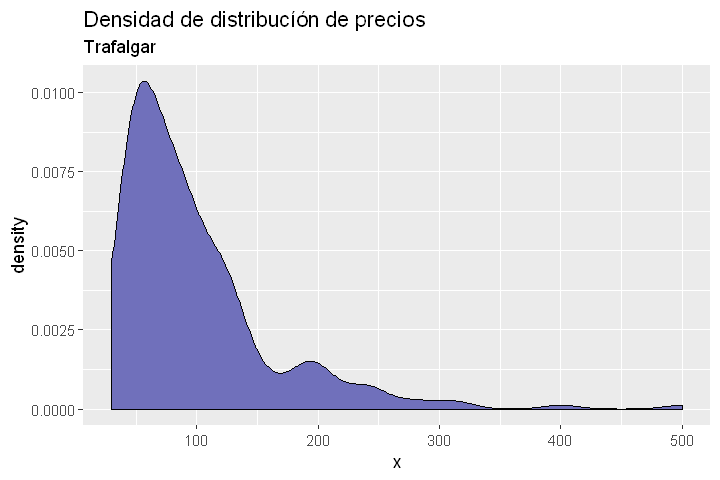

In [265]:
barrioPr <- airbnb_entire[airbnb_entire$Barrio == nnn[4], ]$Precio

ggplot(data=data.frame(x=barrioPr), aes(x))+
geom_density(fill="#7070BB",color="#010101")+
 ggtitle("Densidad de distribucíón de precios", nnn[4])

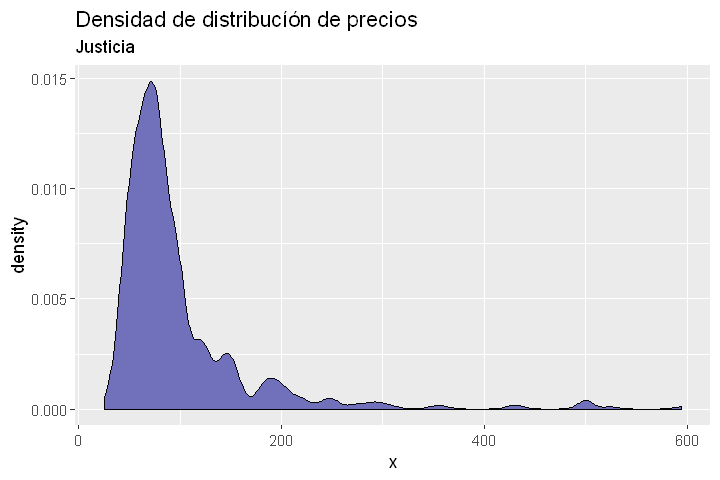

In [266]:
barrioPr <- airbnb_entire[airbnb_entire$Barrio == nnn[5], ]$Precio

ggplot(data=data.frame(x=barrioPr), aes(x))+
geom_density(fill="#7070BB",color="#010101")+
 ggtitle("Densidad de distribucíón de precios ", nnn[5])

Podemos ver que la distribución de precios no parece muy normal por barrios tampoco

P21 - Calcula el tamaño medio, en metros cuadrados, para los 5 barrios anteriores y muestralo en el mismo dataframe junto con el precio y número de entradas

Esta es una pregunta parecida a la 18, lo que hacemos es un aggregate que calcule los metros cuadrados medios, hacemos un merge, y despues ordenamos por precio medio.

In [267]:
DFaux6 <- aggregate(airbnb_entire[ , "MetrosCuadrados"], by = list(airbnb_entire$Barrio), FUN = mean, na.rm = TRUE)

names (DFaux6) <- c("Barrio", "TamañoMedio")

head(DFaux6)

Barrio,TamañoMedio
Abrantes,NaN
Acacias,48.300
Adelfas,38.355
Aeropuerto,NaN
Aguilas,NaN
Alameda de Osuna,NaN


In [268]:
barriosCarosTamano <- merge(x = barriosCaros, y = DFaux6, by = c("Barrio"))

barriosCarosTamano

Barrio,PrecioMedio,Freq,TamañoMedio
Goya,111.33803,142,51.23333
Justicia,98.25468,534,28.27647
Recoletos,161.92537,135,26.43333
Sol,100.75036,701,45.21750
Trafalgar,98.57848,223,29.04714


P22 - Dibuja el diagrama de densidad de distribución de los diferentes tamaños de apartamentos. Serían 5 gráficas, una por cada barrio.

Hacemos lo mismo que con los gráficos de los precios, seguimos utilizando el vector nnn, que, por desgracia, no conseguimos utilizar con éxito en un for loop. Hay que darse cuenta que muchos valores son NA.

Warning message:
"Removed 132 rows containing non-finite values (stat_density)."

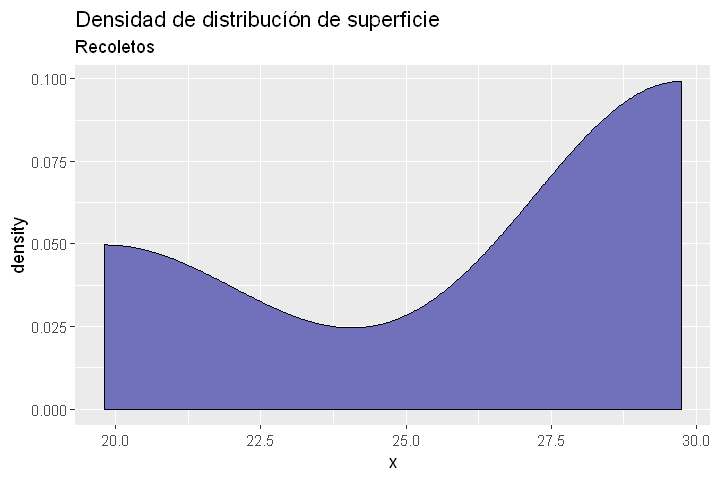

In [269]:
barrioPr <- airbnb_entire[airbnb_entire$Barrio == nnn[1], ]$MetrosCuadrados

ggplot(data=data.frame(x=barrioPr), aes(x))+
geom_density(fill="#7070BB",color="#010101")+
 ggtitle("Densidad de distribucíón de superficie", nnn[1])

Warning message:
"Removed 139 rows containing non-finite values (stat_density)."

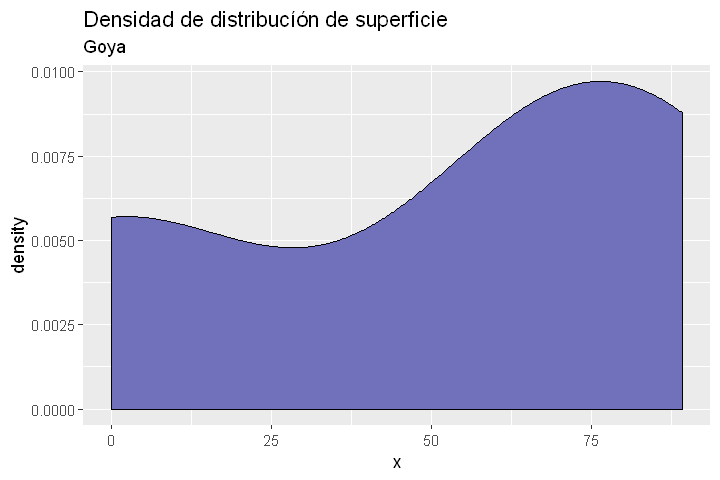

In [270]:
barrioPr <- airbnb_entire[airbnb_entire$Barrio == nnn[2], ]$MetrosCuadrados

ggplot(data=data.frame(x=barrioPr), aes(x))+
geom_density(fill="#7070BB",color="#010101")+
 ggtitle("Densidad de distribucíón de superficie", nnn[2])

Warning message:
"Removed 641 rows containing non-finite values (stat_density)."

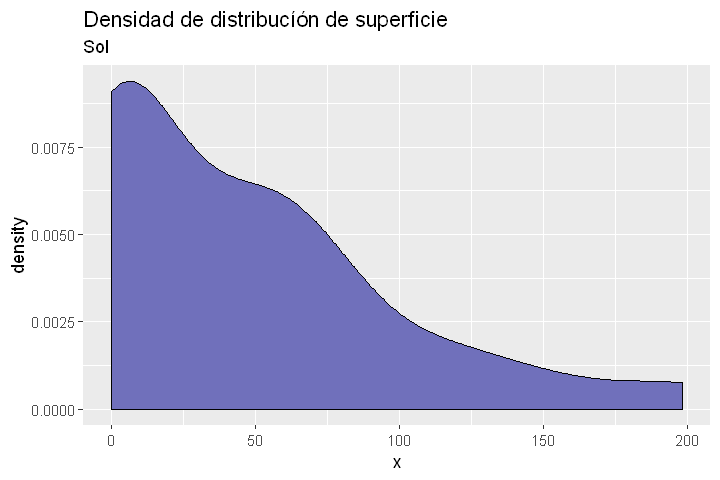

In [271]:
barrioPr <- airbnb_entire[airbnb_entire$Barrio == nnn[3], ]$MetrosCuadrados

ggplot(data=data.frame(x=barrioPr), aes(x))+
geom_density(fill="#7070BB",color="#010101")+
 ggtitle("Densidad de distribucíón de superficie", nnn[3])

Warning message:
"Removed 216 rows containing non-finite values (stat_density)."

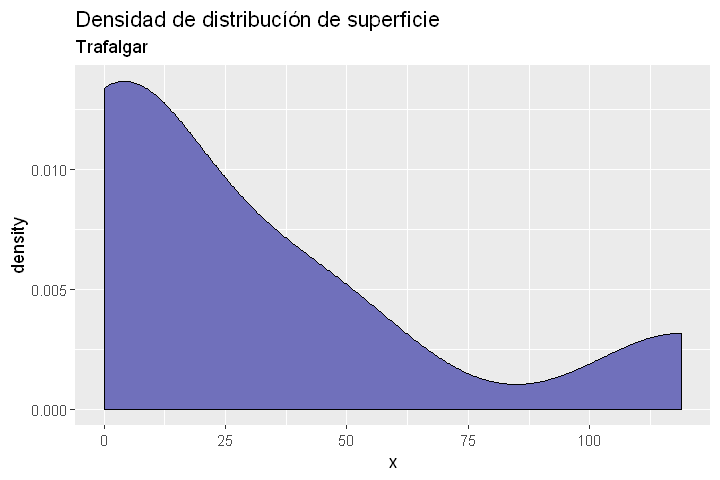

In [274]:
barrioPr <- airbnb_entire[airbnb_entire$Barrio == nnn[4], ]$MetrosCuadrados

ggplot(data=data.frame(x=barrioPr), aes(x))+
geom_density(fill="#7070BB",color="#010101")+
 ggtitle("Densidad de distribucíón de superficie ", nnn[4])

Warning message:
"Removed 517 rows containing non-finite values (stat_density)."

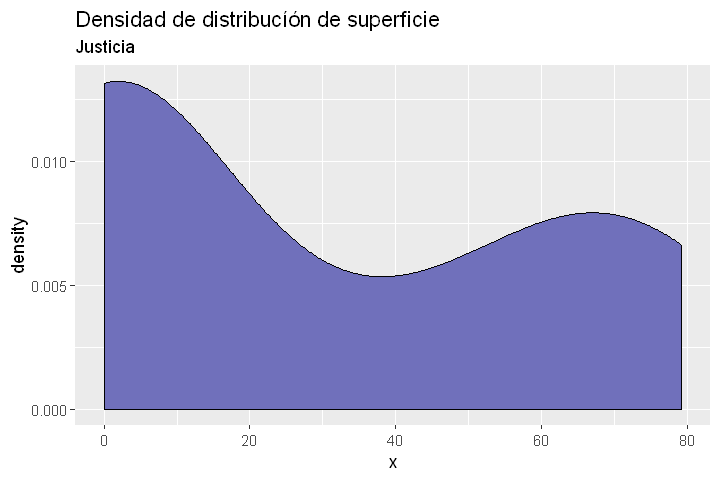

In [273]:
barrioPr <- airbnb_entire[airbnb_entire$Barrio == nnn[5], ]$MetrosCuadrados

ggplot(data=data.frame(x=barrioPr), aes(x))+
geom_density(fill="#7070BB",color="#010101")+
 ggtitle("Densidad de distribucíón de superficie", nnn[5])

P23 - Esta claro que las medias de cada uno de estos 5 barrios parecen ser diferentes, pero ¿son estadísticamente diferentes?
¿Que test habría que usar para comprobarlo?

Podemos utilizar ANOVA, en el caso, poco probable, que que la distribución de la superficie de cada barrio fuese normal. Lo más probable, viendo las gráficas, es que no sea así. Pese a ello, hacemos el test de shapiro a algunos de los barrios.

In [300]:
shapiro.test(airbnb_entire$MetrosCuadrados[airbnb_entire$Barrio == nnn[1]])  # Shapiro de Recoletos


	Shapiro-Wilk normality test

data:  airbnb_entire$MetrosCuadrados[airbnb_entire$Barrio == nnn[1]]
W = 0.75, p-value < 2.2e-16


In [298]:
shapiro.test(airbnb_entire$MetrosCuadrados[airbnb_entire$Barrio == nnn[2]]) # Shapiro de Goya


	Shapiro-Wilk normality test

data:  airbnb_entire$MetrosCuadrados[airbnb_entire$Barrio == nnn[2]]
W = 0.93817, p-value = 0.5201


In [299]:
shapiro.test(airbnb_entire$MetrosCuadrados[airbnb_entire$Barrio == nnn[3]])   # Shapiro de Sol


	Shapiro-Wilk normality test

data:  airbnb_entire$MetrosCuadrados[airbnb_entire$Barrio == nnn[3]]
W = 0.83088, p-value = 8.689e-07


In [287]:
shapiro.test(airbnb_entire$MetrosCuadrados[airbnb_entire$Barrio == nnn[4]])   # Shapiro de Trafalgar


	Shapiro-Wilk normality test

data:  airbnb_entire$MetrosCuadrados[airbnb_entire$Barrio == nnn[4]]
W = 0.75022, p-value = 0.01275


In [303]:
shapiro.test(airbnb_entire$MetrosCuadrados[airbnb_entire$Barrio == nnn[5] ])   # Shapiro de Justicia


	Shapiro-Wilk normality test

data:  airbnb_entire$MetrosCuadrados[airbnb_entire$Barrio == nnn[5]]
W = 0.76212, p-value = 0.000642


Lo cierto es que uno de los barrios, Goya, sí es normal, pero los otros cuatro no. No podemos pues utilizar realmente ANOVA. Tendremos que usar KW otra vez.

Lo más cómodo es construir un DF solo con los 5 barrios a partir de airbnb_entire

In [304]:
DFcincoBarrios <- airbnb_entire[airbnb_entire$Barrio == nnn[1] |
                               airbnb_entire$Barrio == nnn[2] |
                               airbnb_entire$Barrio == nnn[3] |
                               airbnb_entire$Barrio == nnn[4] |
                               airbnb_entire$Barrio == nnn[5], ]

In [305]:
dim(DFcincoBarrios)

[1] 1735   14

In [306]:
head(DFcincoBarrios)

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
15,28013,Sol,Apartment,Entire home/apt,4,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Suitable for events,Washer,Essentials,Hangers,Hair dryer,Iron",646,75,91,59.49
16,28013,Sol,Condominium,Entire home/apt,6,1,2,3,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Dryer,Essentials,Shampoo,Hangers,Hair dryer,Iron",NA,130,100,NA
17,28013,Sol,Apartment,Entire home/apt,4,1,1,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,100,97,NA
18,28012,Sol,Apartment,Entire home/apt,6,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Dryer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,160,95,NA
19,28013,Sol,Apartment,Entire home/apt,4,1,1,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Heating,Washer,Essentials,Hangers,Hair dryer,translation missing: en.hosting_amenity_50",NA,49,95,NA
21,28013,Sol,Apartment,Entire home/apt,4,1,1,2,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Laptop friendly workspace",NA,70,88,NA


Ahora aplicamos KW, a el DF que hemos confeccionado, que solo contiene las filas de esos cinco barrios.

In [307]:
KWtest2 <- kruskal.test(MetrosCuadrados ~ Barrio, data = DFcincoBarrios)

In [308]:
KWtest2


	Kruskal-Wallis rank sum test

data:  MetrosCuadrados by Barrio
Kruskal-Wallis chi-squared = 1.882, df = 4, p-value = 0.7574


Caramba, caramba, KW da un p-value de 0.76, con lo que no se puede descartar que las superficies medias de los barrios sean iguales. Curioso.

P24 - Para únicamente los pisos de alquiler en el barrio de Sol:

``barrio_sol<-subset(airbnb_entire,Barrio=="Sol")``

Calcular un modelo lineal que combine alguna de estas variables:
* NumBanyos
* NumDormitorios
* MaxOcupantes
* MetrosCuadrados

Ejecutamos el comando del enunciado

In [309]:
barrio_sol<-subset(airbnb_entire,Barrio=="Sol")

In [310]:
barrio_sol

,CodigoPostal,Barrio,TipoPropiedad,TipoAlquiler,MaxOcupantes,NumBanyos,NumDormitorios,NumCamas,TipoCama,Comodidades,PiesCuadrados,Precio,Puntuacion,MetrosCuadrados
15,28013,Sol,Apartment,Entire home/apt,4,1,1,1,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Suitable for events,Washer,Essentials,Hangers,Hair dryer,Iron",646,75,91,59.49
16,28013,Sol,Condominium,Entire home/apt,6,1,2,3,Real Bed,"TV,Wireless Internet,Air conditioning,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Dryer,Essentials,Shampoo,Hangers,Hair dryer,Iron",NA,130,100,NA
17,28013,Sol,Apartment,Entire home/apt,4,1,1,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Smoke detector,Carbon monoxide detector,First aid kit,Safety card,Fire extinguisher,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,100,97,NA
18,28012,Sol,Apartment,Entire home/apt,6,1,2,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Dryer,Essentials,Shampoo,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,160,95,NA
19,28013,Sol,Apartment,Entire home/apt,4,1,1,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Heating,Washer,Essentials,Hangers,Hair dryer,translation missing: en.hosting_amenity_50",NA,49,95,NA
21,28013,Sol,Apartment,Entire home/apt,4,1,1,2,Real Bed,"TV,Wireless Internet,Kitchen,Pets allowed,Elevator in building,Heating,Family/kid friendly,Washer,Essentials,Shampoo,Hangers,Hair dryer,Laptop friendly workspace",NA,70,88,NA
22,28005,Sol,Apartment,Entire home/apt,10,2,4,7,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Heating,Family/kid friendly,Washer,Essentials",NA,210,81,NA
23,28013,Sol,Apartment,Entire home/apt,6,1,2,4,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Smoking allowed,Pets allowed,Doorman,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,First aid kit,Safety card,Essentials,Shampoo,Hangers,Hair dryer,Iron",NA,120,99,NA
24,28012,Sol,Apartment,Entire home/apt,4,1,1,2,Real Bed,"TV,Internet,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Heating,Family/kid friendly,Washer,Smoke detector,Carbon monoxide detector,Essentials,Shampoo,24-hour check-in,Hangers,Hair dryer,Iron,Laptop friendly workspace",NA,50,91,NA
25,28012,Sol,Apartment,Entire home/apt,4,1,1,1,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air conditioning,Kitchen,Elevator in building,Buzzer/wireless intercom,Heating,Family/kid friendly,Washer,Essentials,Hair dryer,Iron",753,100,87,69.34


Construimos el modelo lineal con ln(), y miramos los datos principales. Vemos que el máximo número de ocupantes está negativamente correlacionado con el Precio, lo cual no tiene sentido. De hecho, solo dos de las variables, número de dormitorios y metros cuadrados tienen significado estadístico.

In [313]:
modelSol <- lm(data = barrio_sol, formula = Precio ~ NumBanyos + NumDormitorios + MaxOcupantes + MetrosCuadrados)

In [314]:
modelSol


Call:
lm(formula = Precio ~ NumBanyos + NumDormitorios + MaxOcupantes + 
    MetrosCuadrados, data = barrio_sol)

Coefficients:
    (Intercept)        NumBanyos   NumDormitorios     MaxOcupantes  
        42.2873          15.7086          22.7533          -2.8505  
MetrosCuadrados  
         0.3016  


In [315]:
confint(modelSol)

,2.5 %,97.5 %
(Intercept),21.73291160,62.8417278
NumBanyos,-4.64686285,36.0640123
NumDormitorios,9.61023318,35.8963104
MaxOcupantes,-8.06657667,2.3655987
MetrosCuadrados,0.09954058,0.5037457


In [316]:
summary(modelSol)


Call:
lm(formula = Precio ~ NumBanyos + NumDormitorios + MaxOcupantes + 
    MetrosCuadrados, data = barrio_sol)

Residuals:
    Min      1Q  Median      3Q     Max 
-67.851 -15.599  -4.021  10.043 108.406 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      42.2873    10.2565   4.123 0.000127 ***
NumBanyos        15.7086    10.1572   1.547 0.127707    
NumDormitorios   22.7533     6.5583   3.469 0.001022 ** 
MaxOcupantes     -2.8505     2.6028  -1.095 0.278215    
MetrosCuadrados   0.3016     0.1008   2.991 0.004154 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 32.42 on 55 degrees of freedom
  (641 observations deleted due to missingness)
Multiple R-squared:  0.6108,	Adjusted R-squared:  0.5825 
F-statistic: 21.58 on 4 and 55 DF,  p-value: 9.532e-11


P25 - Primero calculamos la correlación para ver como se relacionan estas variables entre sí.

Entendemos que debemos de calcular el R2 de las variables. El R2 del modelo es 0.61.

Para calcular el R2 de las variables y aplicar cor(), debemos introducir un DF solo con los valores numéricos, y eliminando los NA. A este DF lo llamamos correl.

In [318]:
correl <- data.frame(NumBanyos = barrio_sol$NumBanyos,
                    
                    Precio = barrio_sol$Precio,
                    
                    NumDormitorios = barrio_sol$NumDormitorios,
                    
                    MaxOcupantes = barrio_sol$MaxOcupantes,
                    
                    MetrosCuadrados = barrio_sol$MetrosCuadrados)

head(correl)

NumBanyos,Precio,NumDormitorios,MaxOcupantes,MetrosCuadrados
1,75,1,4,59.49
1,130,2,6,NA
1,100,1,4,NA
1,160,2,6,NA
1,49,1,4,NA
1,70,1,4,NA


Eliminamos los NA y mediante cor() obtenemos la matriz de correlaciones.
El problema es que contamos con pocos datos ahora, apenas 60 filas, principalmente debido a los pocos datos de metros cuadrados.

In [347]:
correl <- na.omit(correl)
dim(correl)

[1] 60  5

In [348]:
cor(correl, y = NULL)

,NumBanyos,Precio,NumDormitorios,MaxOcupantes,MetrosCuadrados
NumBanyos,1.0000000,0.5975571,0.6873719,0.7017290,0.4820652
Precio,0.5975571,1.0000000,0.7160551,0.5269961,0.6381848
NumDormitorios,0.6873719,0.7160551,1.0000000,0.7853809,0.5684604
MaxOcupantes,0.7017290,0.5269961,0.7853809,1.0000000,0.4286349
MetrosCuadrados,0.4820652,0.6381848,0.5684604,0.4286349,1.0000000


P26 - Se observa que la correlación entre el número de dormitorios y los metros cuadrados es sorprendentemente baja.
¿Son de fiar esos números?

Mediante un histograma o curvas de densidad podemos descartar números que notienen sentido en el dataframe barrio_sol,
para tener una matriz de correlación que tenga mayor sentido.


Es cierto que la correlación entre NumDormitorios y MetrosCuadrados es la más baja que tiene la primera variable con las demás, pero no es demasiado baja. De todas manereas miremos el histograma. Se observa que hay bastantes apartamentos con cero habitaciones, lo que no tiene sentido. Un primer movimiento sería el eliminar esos datos.

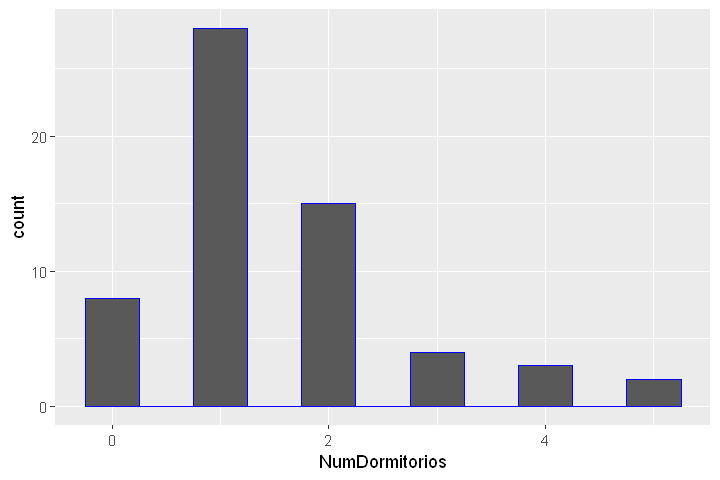

In [349]:
ggplot(correl, aes(x=NumDormitorios))+geom_histogram(color="blue",bins=11)

In [350]:
table(correl$NumDormitorios)


 0  1  2  3  4  5 
 8 28 15  4  3  2 

Eliminamos las filas con cero dormitorios.

In [351]:
correlAj <- correl[correl$NumDormitorios != 0, ]

In [352]:
table(correlAj$NumDormitorios)


 1  2  3  4  5 
28 15  4  3  2 

In [353]:
correlAj <- na.omit(correlAj)

In [354]:
cor(correlAj, y = NULL)

,NumBanyos,Precio,NumDormitorios,MaxOcupantes,MetrosCuadrados
NumBanyos,1.0000000,0.5988275,0.6935420,0.6910994,0.4670048
Precio,0.5988275,1.0000000,0.7521506,0.5157701,0.6681031
NumDormitorios,0.6935420,0.7521506,1.0000000,0.8027411,0.5671645
MaxOcupantes,0.6910994,0.5157701,0.8027411,1.0000000,0.4096472
MetrosCuadrados,0.4670048,0.6681031,0.5671645,0.4096472,1.0000000


Lo cierto es que no conseguimos que se incremente la correlación, sigue en 0.57.

Otro intento puede ser el asumir que los que apartamentos con cero habitaciones en realidad tienen una, y es esa la transformación que hacemos.

In [355]:
correlAj2 <- correl

In [356]:
correlAj2$NumDormitorios[correlAj2$NumDormitorios == 0] <- 1

In [357]:
table(correlAj2$NumDormitorios)


 1  2  3  4  5 
36 15  4  3  2 

In [345]:
cor(correlAj2, y = NULL)

,NumBanyos,Precio,NumDormitorios,MaxOcupantes,MetrosCuadrados
NumBanyos,1.0000000,0.5975571,0.7087798,0.7017290,0.4820652
Precio,0.5975571,1.0000000,0.7414719,0.5269961,0.6381848
NumDormitorios,0.7087798,0.7414719,1.0000000,0.8097499,0.5799297
MaxOcupantes,0.7017290,0.5269961,0.8097499,1.0000000,0.4286349
MetrosCuadrados,0.4820652,0.6381848,0.5799297,0.4286349,1.0000000


Lo cierto es que sí logramos incrementar algo el coeficiente de correlación, aunque sea apenas 0.02 hasta 0.58.

P27 - Una vez que hayamos filtrado los datos correspondientes calcular el valor o la combinación de valores que mejor nos permite obtener el precio de un inmueble.

Hacemos una copia de barrio_sol para cambiar las habitaciones de cero a una, aunque personalmente tengo dudas que sea kosher: debe haber apartamentos sin habitacines, pero en fin...

In [358]:
barrio_sol_Aj <- barrio_sol

In [360]:
barrio_sol_Aj$NumDormitorios[barrio_sol_Aj$NumDormitorios == 0] <- 1

In [361]:
table(barrio_sol_Aj$NumDormitorios)


  1   2   3   4   5   7  10 
412 211  55  18   3   1   1 

Calculamos el modelo desde el principio, con todas las variables. Sí que mejoramos la fiabilidad de la variable NumDormitorios respecto al modelo anterior.

In [365]:
modelSol2 <- lm(data = barrio_sol_Aj, formula = Precio ~ NumBanyos + NumDormitorios + MaxOcupantes + MetrosCuadrados)

In [364]:
summary(modelSol2)


Call:
lm(formula = Precio ~ NumBanyos + NumDormitorios + MaxOcupantes + 
    MetrosCuadrados, data = barrio_sol_Aj)

Residuals:
    Min      1Q  Median      3Q     Max 
-86.912 -14.258  -4.922  10.965  91.291 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)      35.7022     9.7064   3.678 0.000535 ***
NumBanyos        13.4215     9.8602   1.361 0.179007    
NumDormitorios   31.7756     7.6909   4.132 0.000124 ***
MaxOcupantes     -4.2976     2.6076  -1.648 0.105033    
MetrosCuadrados   0.2725     0.0982   2.775 0.007524 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 31.27 on 55 degrees of freedom
  (641 observations deleted due to missingness)
Multiple R-squared:  0.638,	Adjusted R-squared:  0.6117 
F-statistic: 24.23 on 4 and 55 DF,  p-value: 1.356e-11


Ahora recalculamos el modelo con las dos variables realmente importantes: NumDormitorios y los MetrosCuadrados, y hacemos un summary

In [368]:
modelSol2_Aj <- lm(data = barrio_sol_Aj, formula = Precio ~ NumDormitorios + MetrosCuadrados)

In [380]:
summary(modelSol2_Aj)


Call:
lm(formula = Precio ~ NumDormitorios + MetrosCuadrados, data = barrio_sol_Aj)

Residuals:
    Min      1Q  Median      3Q     Max 
-74.909 -14.077  -1.829  14.895  89.260 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     38.64001    7.79789   4.955 6.81e-06 ***
NumDormitorios  27.10027    4.88532   5.547 7.83e-07 ***
MetrosCuadrados  0.30430    0.09785   3.110  0.00292 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 31.67 on 57 degrees of freedom
  (641 observations deleted due to missingness)
Multiple R-squared:  0.6151,	Adjusted R-squared:  0.6016 
F-statistic: 45.54 on 2 and 57 DF,  p-value: 1.524e-12


P28 - ¿Que variable es más fiable para conocer el precio de un inmueble, el número de habitaciones o los metros cuadrados?

Sin duda el número de dormitorios, ya que tiene una p-valor mucho más pequeña, casi cero, frente a una aceptable, pero mayor, en el caso de los metros cuadrados.

P29 - Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada metro cuadrado extra del piso?

Vemos en el summary que el estimate (coeficiente) de la variable MetrosCuadrados es 0.304, por lo que cada metro cuadrado adicinal incrementa el precio en 0.304 euros. Aplicado el confint del modelo vemos que, con el margen de error del 95%, esa cantidad podría estar entre 0.108 y 0.500 euros.

In [373]:
confint(modelSol2_Aj)

,2.5 %,97.5 %
(Intercept),23.025010,54.2550105
NumDormitorios,17.317586,36.8829605
MetrosCuadrados,0.108348,0.5002453


P30 - Responde con su correspondiente margen de error del 95%, ¿cuantos euros incrementa el precio del alquiler por cada habitación?

Basándonos en los mismos datos de la pregunta anterior, vemos en el summary del modelo que cada habitación incrementa el precio de alquiler en 27.1 euros. Con el 95% de error, éste oscilaría entre 17.32 y 36.88 euros.

P31 - ¿Cual es la probabilidad de encontrar, en el barrio de Sol, un apartamento en alquiler con 3 dormitorios?
¿Cual es el margen de error de esa probabilidad?

Para calcular la probabilidad calculamos la distribución de dormitorios en Sol con count(). Vemos cuantos hay con tres habitaciones, y lo dividimos entre la suma, siendo esta probabilidad del 7.85%.

In [381]:
DFaux7 <- count(barrio_sol, NumDormitorios)
DFaux7

NumDormitorios,n
0,91
1,321
2,211
3,55
4,18
5,3
7,1
10,1


In [382]:
sucesos <- DFaux7[DFaux7$NumDormitorios == 3, ]$n

sucesos

[1] 55

In [377]:
dorm = sum(DFaux7$n) # número total de dormitorios

dorm

[1] 701

In [383]:
paste("La probabilidad de encontrar un apartamento en Sol de 3 habitaciones es del ", round(100*sucesos/dorm, 2), "%")

[1] "La probabilidad de encontrar un apartamento en Sol de 3 habitaciones es del  7.85 %"

Aplicamos binom.test para ver el margen de error de la probabilidad calculada antes. Al 90%, el intervalo es de 6.23% - 9.72%

In [384]:
binom.test(sucesos,dorm,conf.level = 0.90)


	Exact binomial test

data:  sucesos and dorm
number of successes = 55, number of trials = 701, p-value < 2.2e-16
alternative hypothesis: true probability of success is not equal to 0.5
90 percent confidence interval:
 0.06238626 0.09723529
sample estimates:
probability of success 
            0.07845934 
